In [431]:
import numpy as np

alpha = 0.2
c = 2
beta = 0.01
sigma = 0.1
grid_size = (20,20)
initial_population = 1

grid = np.ones(grid_size) * 0.75

population = np.zeros(grid_size)
start_location = np.random.randint(0, grid_size[0]), np.random.randint(0, grid_size[1])
population[start_location] = initial_population
iterations = 80
grid_ret = []
population_ret = []
grid_ret_no = []
population_ret_no = []
for iteration in range(0, iterations):
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if population[i, j] > 0 and grid[i, j] > 0:
                Z_m = alpha * grid[i, j] + 0.5
                B = Z_m * (1 - Z_m) * c
                grid[i, j] = grid[i, j] - population[i, j] * beta + sigma + 0.05
                if grid[i, j] < 0:
                    grid[i, j] = 0
                    population[i, j] = 0
                if population[i, j] > 0:
                    population[i, j] = population[i, j] + B + grid[i, j] - 1
                    print(B + grid[i, j] - 2)
                if grid[i, j] < 0.8:  
                    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                        new_x, new_y = i + dx, j + dy
                        if 0 <= new_x < grid_size[0] and 0 <= new_y < grid_size[1] and grid[new_x, new_y] > 0:
                            population[new_x, new_y] += 1
            elif grid[i, j] < 0:
                grid[i, j] = 0
    grid_ret.append(sum(grid.sum(axis=0)))
    population_ret.append(sum(population.sum(axis=0)))


grid = np.ones(grid_size) * 0.75

population = np.zeros(grid_size)
start_location = np.random.randint(0, grid_size[0]), np.random.randint(0, grid_size[1])
population[start_location] = initial_population
for iteration in range(0, iterations):
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if population[i, j] > 0 and grid[i, j] > 0:
                Z_m = 0.5
                B = Z_m * (1 - Z_m) * c
                grid[i, j] = grid[i, j] - population[i, j] * beta + sigma 
                if grid[i, j] < 0:
                    grid[i, j] = 0
                    population[i, j] = 0
                if population[i, j] > 0:
                    population[i, j] = population[i, j] + B + grid[i, j] - 1.5
                if 0 < grid[i, j] < 0.8:  
                    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                        new_x, new_y = i + dx, j + dy
                        if 0 <= new_x < grid_size[0] and 0 <= new_y < grid_size[1] and grid[new_x, new_y] > 0:
                                population[new_x, new_y] += 1
            elif grid[i, j] < 0:
                grid[i, j] = 0
    grid_ret_no.append(sum(grid.sum(axis=0)))
    population_ret_no.append(sum(population.sum(axis=0)))

-0.655
-0.536818
-0.4258362121999997
-0.3227191598038006
-0.22797650912403444
-0.1419762106548761
-0.06496025309742892
0.0029378826060839636
0.06167492937058805
0.1112794802776067
0.15183425737555423
0.18345957833987514
0.20629848760085556
0.2205039135739253
0.22622811638052553
0.22361460323155846
0.21279261230302682
0.19387420008685918
0.16695391052758035
0.13211095478114432
0.08941378580878956
0.038926909795915066
-0.019280265742658065
-0.08512279128326838
-0.15848803334300343
-0.23922237360158172
-0.3271171460742721
-0.42189426629648086
-0.5231920635009779
-0.6305518804553936
-0.7434060516139285
-0.8610679033216537
-0.655
-0.655
-0.655
-0.655
-0.9827244342199142
-0.546818
-0.546818
-0.546818
-0.546818
-1.1074323237693127
-0.45410173219999983
-0.45410173219999983
-0.45410173219999983
-0.45410173219999983
-1.2341178762547051
-0.3767659136306807
-0.3767659136306807
-0.3767659136306807
-0.3767659136306807
-1.3615814319570676
-0.3146207334728035
-0.3146207334728035
-0.3146207334728035
-0

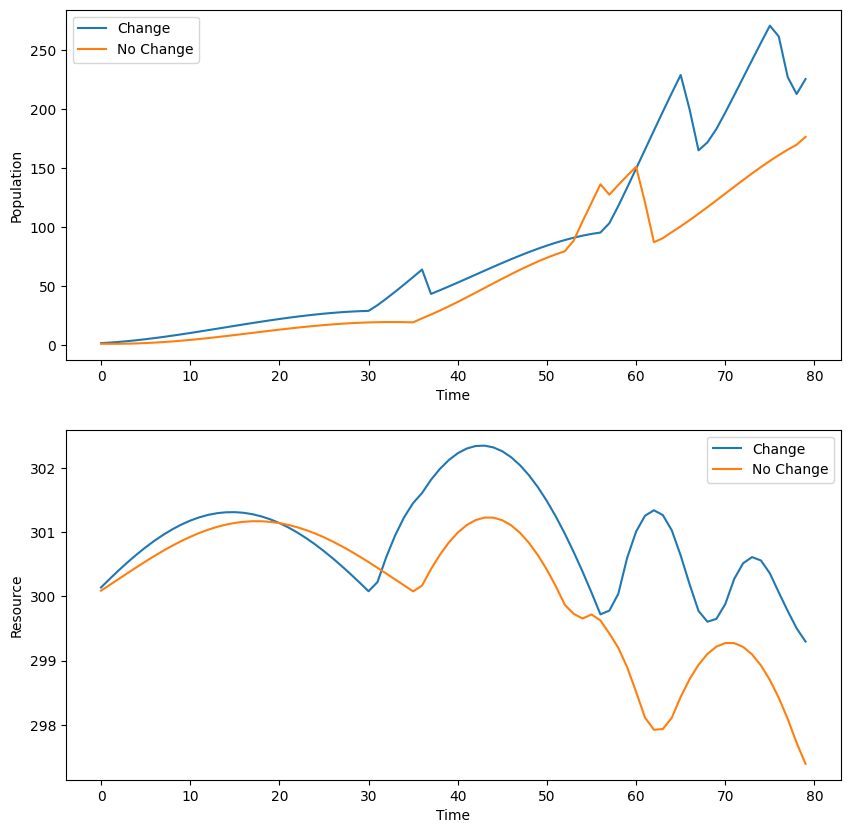

In [432]:
import pylab as plt
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(population_ret, label = 'Change')
plt.plot(population_ret_no, label = 'No Change')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(grid_ret, label = 'Change')
plt.plot(grid_ret_no, label = 'No Change')
plt.xlabel('Time')
plt.ylabel('Resource')
plt.legend()
plt.savefig(fname = 'resource_less.jpg', dpi = 500, bbox_inches = 'tight')